# Assign Other annotations

To assemble our annotations, we'll read our clustered Other data and assign our expert annotations to those clusters. We'll then inspect the annotations in our UMAP projections, and output final labels for these cells

In [1]:
from datetime import date
import hisepy
import os
import pandas as pd
import scanpy as sc

## Read subclustering results from HISE

In [2]:
cell_class = 'other'

In [3]:
h5ad_uuid = '89de4d50-8ec3-4e89-b5dd-0b6289a4ffd0'
h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)

In [4]:
if not os.path.isdir(h5ad_path):
    hise_res = hisepy.reader.cache_files([h5ad_uuid])

In [5]:
h5ad_filename = os.listdir(h5ad_path)[0]
h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)

In [6]:
adata = sc.read_h5ad(h5ad_file)

In [7]:
adata

AnnData object with n_obs × n_vars = 24603 × 4305
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'file.id', 'subject.cmv', 'subject.bmi', 'celltypist.low', 'seurat.l1', 'seurat.l1.score', 'seurat.l2', 'seurat.l2.score', 'seurat.l2.5', 'seurat.l2.5.score', 'seurat.l3', 'seurat.l3.score', 'predicted_doublet', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden', 'leiden_resolution_1', 'leiden_resol

## Read annotations

In [8]:
anno_uuid = '906cecf8-c4ae-4e7d-8dd7-0a21dbe162cc'
anno_path = '/home/jupyter/cache/{u}'.format(u = anno_uuid)

In [9]:
if not os.path.isdir(anno_path):
    hise_res = hisepy.reader.cache_files([anno_uuid])

downloading fileID: 906cecf8-c4ae-4e7d-8dd7-0a21dbe162cc
Files have been successfully downloaded!


In [10]:
anno_filename = os.listdir(anno_path)[0]
anno_file = '{p}/{f}'.format(p = anno_path, f = anno_filename)

In [16]:
anno = pd.read_csv(anno_file, index_col = 0)

In [17]:
anno.head()

,leiden_resolution_1,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final
0,0,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
1,1,Platelet,Platelet,Yes,Platelet,Yes,Yes
2,2,Platelet,Platelet,Yes,Platelet,Yes,Yes
3,3,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet,Yes,Monocytes+Erythocytes doublet,Yes,Yes
4,4,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes


In [18]:
join_col = 'leiden_resolution_1'

In [19]:
anno[join_col] = anno[join_col].astype('string').astype('category')

In [20]:
obs = adata.obs

In [21]:
sum(obs[join_col].isin(anno[join_col]))

24603

In [22]:
obs_anno = obs.merge(anno, how = 'left', on = join_col)

In [23]:
adata.obs = obs_anno
adata.obs = adata.obs.set_index('barcodes', drop = False)

In [24]:
adata.obs.head()

,barcodes,batch_id,cell_name,cell_uuid,chip_id,hto_barcode,hto_category,n_genes,n_mito_umis,n_reads,...,leiden,leiden_resolution_1,leiden_resolution_1.5,leiden_resolution_2,AIFI_L3,AIFI_L1,AIFI_L1_Final,AIFI_L2,AIFI_L2_Final,AIFI_L3_Final
barcodes,,,,,,,,,,,,,,,,,,,,,
cf7341b848b611ea8957bafe6d70929e,cf7341b848b611ea8957bafe6d70929e,B001,chalky_guileless_waterdogs,cf7341b848b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1482,176,17043,...,22,4,2,13,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
cf7400bc48b611ea8957bafe6d70929e,cf7400bc48b611ea8957bafe6d70929e,B001,illadvised_cogitative_bluejay,cf7400bc48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1089,62,12523,...,22,3,12,14,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet,Yes,Monocytes+Erythocytes doublet,Yes,Yes
cf763b8448b611ea8957bafe6d70929e,cf763b8448b611ea8957bafe6d70929e,B001,tricksome_sombrous_cats,cf763b8448b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1146,89,11185,...,21,0,1,1,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes
cf76501a48b611ea8957bafe6d70929e,cf76501a48b611ea8957bafe6d70929e,B001,pensive_queasy_tadpole,cf76501a48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,1994,108,22387,...,29,9,11,10,CMP cell,Progenitor cell,Yes,Progenitor cell,Yes,Yes
cf83c0ba48b611ea8957bafe6d70929e,cf83c0ba48b611ea8957bafe6d70929e,B001,sodalite_foreign_puffin,cf83c0ba48b611ea8957bafe6d70929e,B001-P1C1,TGATGGCCTATTGGG,singlet,841,44,7236,...,21,0,1,19,T+Erythocytes doublet,T+Erythocytes doublet,Yes,T+Erythocytes doublet,Yes,Yes


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

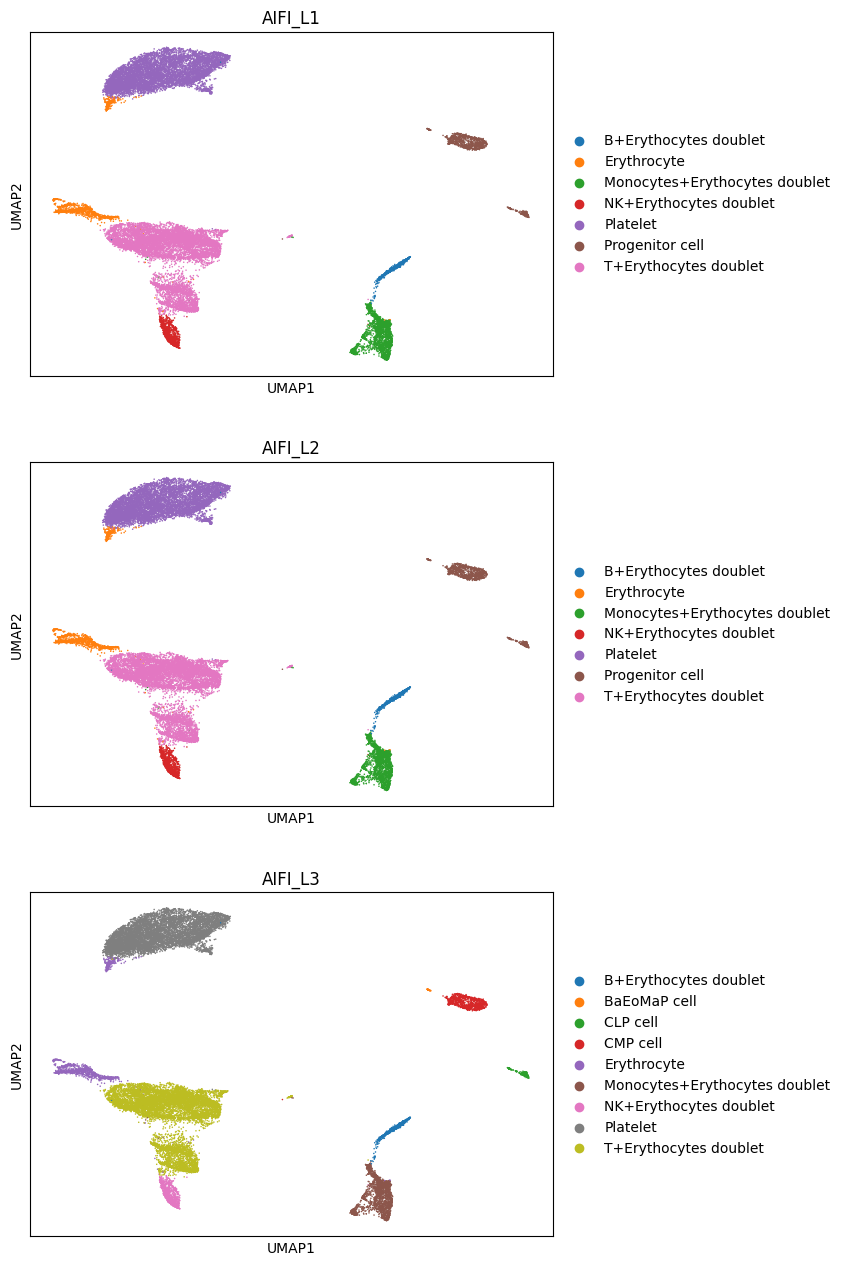

In [25]:
sc.pl.umap(adata, color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'], ncols = 1)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

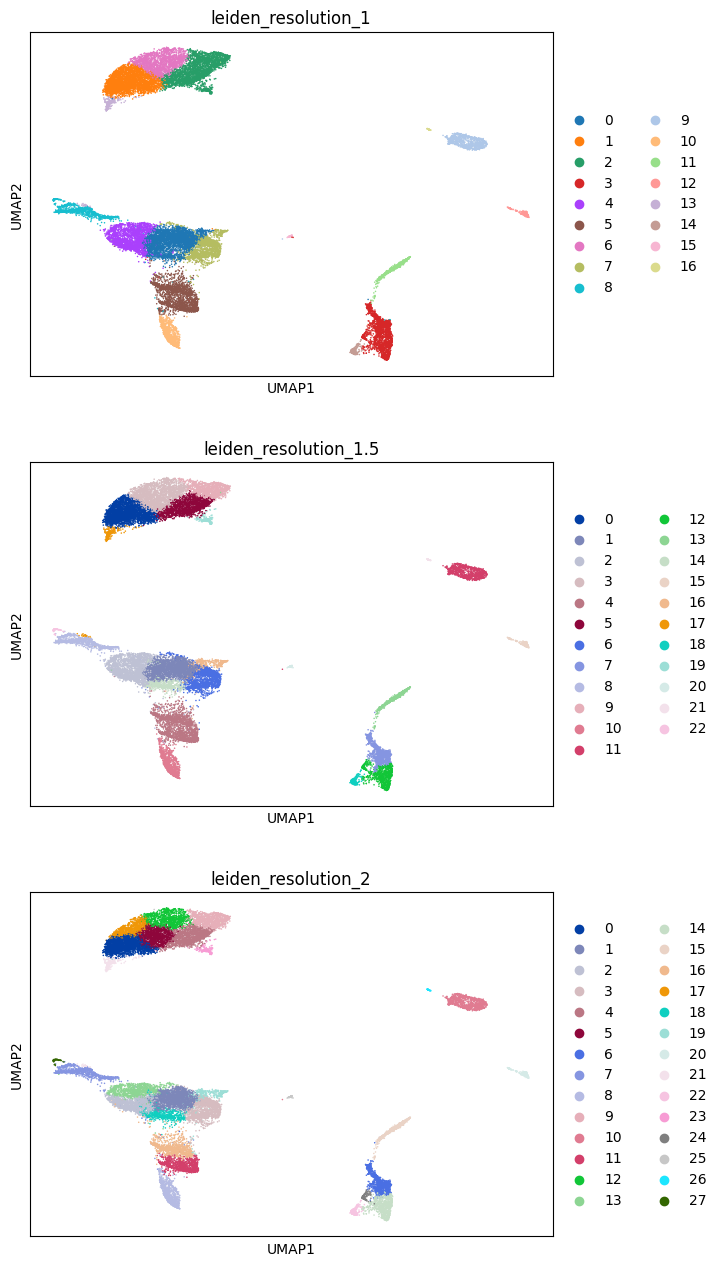

In [26]:
sc.pl.umap(adata, 
           color = ['leiden_resolution_1',
                    'leiden_resolution_1.5',
                    'leiden_resolution_2'],
           ncols = 1)

## Output final annotations

In [27]:
anno = adata.obs[['barcodes', 'AIFI_L1', 'AIFI_L2', 'AIFI_L3']]
anno = anno.reset_index(drop = True)

In [28]:
anno.head()

,barcodes,AIFI_L1,AIFI_L2,AIFI_L3
0,cf7341b848b611ea8957bafe6d70929e,T+Erythocytes doublet,T+Erythocytes doublet,T+Erythocytes doublet
1,cf7400bc48b611ea8957bafe6d70929e,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet,Monocytes+Erythocytes doublet
2,cf763b8448b611ea8957bafe6d70929e,T+Erythocytes doublet,T+Erythocytes doublet,T+Erythocytes doublet
3,cf76501a48b611ea8957bafe6d70929e,Progenitor cell,Progenitor cell,CMP cell
4,cf83c0ba48b611ea8957bafe6d70929e,T+Erythocytes doublet,T+Erythocytes doublet,T+Erythocytes doublet


In [29]:
out_dir = 'output'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

In [30]:
out_csv = '{p}/ref_pbmc_barcode_labels_{c}_{d}.csv'.format(p = out_dir, c = cell_class, d = date.today())

In [31]:
anno.to_csv(out_csv, index = False)

In [32]:
out_parquet = '{p}/ref_pbmc_barcode_labels_{c}_{d}.parquet'.format(p = out_dir, c = cell_class, d = date.today())

In [33]:
anno.to_parquet(out_parquet, index = False)

## Upload annotations to HISE

Finally, we'll use `hisepy.upload.upload_files()` to send a copy of our output to HISE to use for downstream analysis steps.

In [34]:
study_space_uuid = '64097865-486d-43b3-8f94-74994e0a72e0'
title = 'Other barcode annotations {d}'.format(d = date.today())

In [35]:
in_files = [h5ad_uuid, anno_uuid]

In [36]:
in_files

['89de4d50-8ec3-4e89-b5dd-0b6289a4ffd0',
 '906cecf8-c4ae-4e7d-8dd7-0a21dbe162cc']

In [37]:
out_files = [out_csv, out_parquet]

In [38]:
out_files

['output/ref_pbmc_barcode_labels_other_2024-02-26.csv',
 'output/ref_pbmc_barcode_labels_other_2024-02-26.parquet']

In [39]:
hisepy.upload.upload_files(
    files = out_files,
    study_space_id = study_space_uuid,
    title = title,
    input_file_ids = in_files
)

Cannot determine the current notebook.
1) /home/jupyter/scRNA-Reference-IH-A/20-Python_assign_Other_cells.ipynb
2) /home/jupyter/scRNA-Reference-IH-A/19-Python_assign_NK_cells.ipynb
3) /home/jupyter/scRNA-Reference-IH-A/12-Python_B_cell_annotations.ipynb
Please select (1-3) 


 1


you are trying to upload file_ids... ['output/ref_pbmc_barcode_labels_other_2024-02-26.csv', 'output/ref_pbmc_barcode_labels_other_2024-02-26.parquet']. Do you truly want to proceed?


(y/n) y


{'trace_id': '42cd01d2-a709-404a-980c-ccaa688c7c81',
 'files': ['output/ref_pbmc_barcode_labels_other_2024-02-26.csv',
  'output/ref_pbmc_barcode_labels_other_2024-02-26.parquet']}

In [40]:
import session_info
session_info.show()